# Notebook 8: More Discrete Random Variables and More Distributions 
***

In this notebook we'll get some more practice $\color{red}{\text{identifying}}$ and working with the Binomial, Negative Binomial, Geometric, and Poisson distributions. 

We'll need Numpy and Matplotlib for this notebook, so let's load them.  We'll also probably need SciPy's binom function for computing binomial coefficients as well as Python's factorial function.  

In [3]:
import numpy as np 
import matplotlib.pylab as plt 
from scipy.special import binom
from math import factorial 
%matplotlib inline

In [4]:
import scipy.stats as stats
phi = stats.norm.ppf(.95)
print(phi)

1.6448536269514722


### Exercise 1 - Defective Hard Drives 
*** 

A factory manufactures solid state hard drives for Seagate Technology.  Approximately $4\%$ of hard drives that come off of a particular assembly line are defective. For each of the scenarios below: 

1. Define an appropriate random variable and distribution for the experiment. 
2. State the values that the random variable can take on. 
3. Find the probability that the random variable takes on the value $X = 3$. 
4. State any assumptions that you need to make 

**Part A**: $\color{blue}{\text{Out of 20 drives, } k \text{ of them are defective.}}$ 

**Solution:**

1.  If we define success as finding a defective drive, then we're looking for a random variable describing the number of successes in 20 trials.  That is a **binomial distribution** with parameters $n=20$ and $p=0.04$ (where a "success" is a defective hard drive).  So, we have $X \sim Bin(20, 0.04)$.

2.  The random variable $X$ can take on the values of $k=0, 1, 2, \ldots, 20$.

3.  $P(X=3) = {20 \choose 3} \cdot 0.04^3 \cdot (1-0.04)^{20-3} \approx 0.036$

4.  For the binomial distribution, we assume (1) that the production of each drive is independent from all the others (that one drive's defects do not affect other drives' defects), and (2) the probability of defects is constant at $p=0.04$ (that this probability does not change with time).

**Part B**: $\color{blue}{\text{The number of defective drives made that day, where the rate of defective drives per day is 10.}}$ 

**Solution:**

1.  Given that the average rate of defective drives is 10 drives/day, we can model the number of ***hits***, or defective drives, using a Poisson distribution.  If we let the random variable $X$ represent the number of defective drives in a 1-day period, then that is $X \sim Pois(10)$, with rate $\mu = 10$ drives/day.

2.  The random variable $X$ can take values of $k = 0, 1, 2, \ldots$ (with no theoretical upper bound)

3.  $P(X=3) = \dfrac{10^3 \cdot e^{-10}}{3!} \approx 0.00757$

4.  For the Poisson distribution, we assume that the average rate of 10 defective drives per day is constant, and that each drive's probability of being defective is independent of other drives.

**Part C**: $\color{blue}{\text{While we observe the assembly line, the first defective drive observed is the kth drive observed overall.}}$

**Solution:**

1.  This is a **Geometric** distribution -- we want to know $X = $ how many drives we have inspected when we find our first defective drive.  Since the probability of finding a defective drive is $p=0.04$, we have $X \sim Geo(0.04)$.

2. The random variable $X$ can take on values of $k = 1, 2, \ldots$

3. $P(X=3) = (1-0.04)^{3-1} \cdot (0.04) \approx 0.0369$

4. For $X$ to be Geometric, we needed to assume that each drive's probability of being defective is independent of the other drives, and that the probability of a defective drive is constant at $p=0.04$.

**Part D**: $\color{blue}{\text{While we observe the assembly line, the third defective drive observed is the kth drive observed overall.}}$

**Solution:**

1. We want to know how many drives we have inspected when we find our third defective drive. This is a **negative binomial** distribution.  Since the probability of finding a defective drive is $p=0.04$, we have $X \sim NB(3, 0.04)$.

2. The random variable $X$ can take on values of $k=3, 4, \ldots$

3. $P(X=3) = {3-1 \choose 3-1} \cdot (0.04)^3 \cdot (1-0.04)^{3-3} \approx 6.4 \times 10^{-5}$

4. For the random variable to be negative binomial, we need to assume that the probability of each drive being defective is independent of the other drives, and that the probability of any drive being defective is constant at $p=0.04$

### Exercise 2 - Winning Concert Tickets 
*** 

You and a friend want to go to a concert, but unfortunately only one ticket is still available. The man who sells the tickets decides to toss a coin until heads appears. In each toss heads appears with probability $p$, where $0 < p < 1$, independent of each of the previous tosses. If the number of tosses needed is odd, your friend is allowed to buy the ticket; otherwise you can buy it. Would you agree to this arrangement?

**Part A**: What discrete distribution would be useful in solving this problem? 

**Solution:**

We are trying to figure out the probability of $k$ trials before our first "success" (Heads), so a **geometric** distribution would be useful, with parameter $p$.

**Part B**: In a minute we'll compute the approximate probability that you win the concert tickets, but before doing so, can you solve this problem by intuition (and a small amount of math)? 

**Solution:**

The probabilities of the first Heads coming up on the $\color{red}{\text{first}}$, $\color{blue}{\text{second}}$, $\color{green}{\text{third}}$, etc. toss are:
$$\color{red}{p},\phantom{xxxxxx}   \color{blue}{(1-p)p},\phantom{xxxxxx}   \color{green}{(1-p)^2 p},\phantom{xxxxxx}   (1-p)^3 p,\phantom{xx}   \ldots$$

Your friend's probability of winning is the sum of the odd-numbered elements of that sequence:

$$\begin{align*}
p_F &= p + (1-p)^2 p + (1-p)^4 p + \ldots \\
    &= p \sum_{k=0}^{\infty} (1-p)^{2k} ~~~~~\text{geometric series with $r=(1-p)^2$}\\
    &= p \dfrac{1}{1-(1-p)^2} \\
    &= \dfrac{p}{1-(1-2p+p^2)} \\
    &= \dfrac{p}{2p-p^2} \\
    &= \dfrac{1}{2-p}
\end{align*}$$

Now, if you are confident in this calculation, you can say that the probability of you winning is $p_Y = 1-p_F$.  This is a great way to check our actual work, which is below!

$$\begin{align*}
p_y &= (1-p) p + (1-p)^3 p + (1-p)^5 p + \ldots \\
    &= p(1-p) \sum_{k=0}^{\infty} (1-p)^{2k} ~~~~~\text{geometric series with $r=(1-p)^2$}\\
    &= p(1-p) \dfrac{1}{1-(1-p)^2} \\
    &= \dfrac{p(1-p)}{2p-p^2} \\
    &= \dfrac{1-p}{2-p}
\end{align*}$$

And to check that the two of these add up to 1:

$$\begin{align*}
p_F + p_Y &= \dfrac{1}{2-p} + \dfrac{1-p}{2-p} \\
          &= \dfrac{1+1-p}{2-p} \\
          &= \dfrac{2-p}{2-p} = 1 ~~~~\checkmark \\
\end{align*}$$

Anyway, if we look at $p_F$ and $p_Y$, the denominators are the same, but the numerator of $p_Y$ is less than that of $p_F$.  So, it is **not a good deal for you.**

**Part C**: Write a Python function that takes in the probability of heads on the coin and returns the probability mass function of the random variable described above.  You can safely assume that nobody wants to stick around for more than 100 coin flips, so only consider up to and including the 100th coin flip.  So, the output of this function should be an array or list of length 100.

In [15]:
def pmf_geo(p):
    
    n_max = 100
    pmf = np.array([p*((1-p)**(k-1)) for k in range(1, n_max+1)])
    
    return pmf 

#print(pmf_geo(.5))

def add_stuff(j):
    rtrn = np.array([j + 2 for n in range (1, j + 1)])
    return rtrn
print(add_stuff(5))
    
    
print(sum(add_stuff(5)[1::2]))
print(sum(add_stuff(5)[::2]))

[7 7 7 7 7]
14
21


**Part D**: Use the function you wrote in **Part C** to estimate the probabilities that your friend or you win the ticket for different values of the bias of the coin.  Use $p = 0.25$, $~p = 0.5$, and $p = 0.75$. 

In [6]:
# Solution:

p = 0.25
print("For p={}, P(Friend wins)={:.2f} vs P(You win)={:.2f}".format(p,np.sum(pmf_geo(p)[::2]),np.sum(pmf_geo(p)[1::2])))

p = 0.5
print("For p={}, P(Friend wins)={:.2f} vs P(You win)={:.2f}".format(p,np.sum(pmf_geo(p)[::2]),np.sum(pmf_geo(p)[1::2])))

p = 0.75
print("For p={}, P(Friend wins)={:.2f} vs P(You win)={:.2f}".format(p,np.sum(pmf_geo(p)[::2]),np.sum(pmf_geo(p)[1::2])))

For p=0.25, P(Friend wins)=0.57 vs P(You win)=0.43
For p=0.5, P(Friend wins)=0.67 vs P(You win)=0.33
For p=0.75, P(Friend wins)=0.80 vs P(You win)=0.20


### Exercise 3 - Implementing and Sampling the Geometric Distribution 
***

**Part A**: Write a function flips_until_heads that simulates the coin flipping scenario in **Exercise 2**. Your function should take as its sole argument the probability $p$ of flipping Heads for the coin and return the number of flips observed when you find your first Heads.  

In [7]:
coin = np.array(["H", "T"])

def flips_until_heads(p):
    counter = 0
    heads = False
    while(~heads):
        heads = np.random.choice(coin, p=[p, 1-p], size=1)=="H"
        counter += 1
    return counter

**Part B**: Now, run many trials of the experiment and count how many trials result in each value of the random variable.  Make a _density_ histogram of the results, using $p=0.25$. 

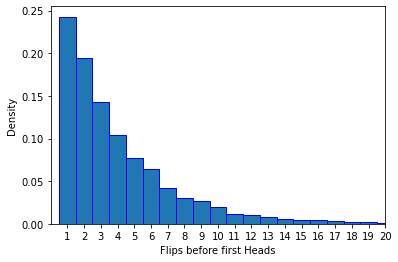

In [8]:
# Solution:

sample = [flips_until_heads(0.25) for k in range(10000)]

bins = np.arange(0.5, 50.5, 1)
plt.hist(sample, edgecolor="blue", bins=bins, density=True)
plt.xticks(range(1,50))
plt.xlim([0,20])
plt.xlabel('Flips before first Heads')
plt.ylabel('Density')
plt.show()

**Part C**: Use the function you wrote in **Exercise 2** to make a bar plot of the probability mass function of $X$.  Does it look like the density histogram from **Part B**?  If not, run your simulation in **Part B** for more trials.  Does the situation improve?  Again, use $p=0.25$ in your codes.

$\color{blue}{\text{A bar graph}}$ is the graphical representation of categorical data using rectangular bars where the length of each bar is proportional to the value they represent.

$\color{blue}{\text{A histogram}}$ is the graphical representation of data where data is grouped into continuous number ranges and each range corresponds to a vertical bar.

**Bar Graph**	
Equal space between every two consecutive bars.	 
The x-axis can represent anything.

**Histogram**	
No space between two consecutive bars.	 
They should be attached to each other.	
The x-axis should represent only continuous data that is in terms of numbers

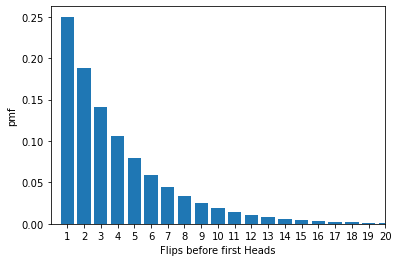

In [9]:
# Solution:

p = 0.25

# get the pmf from the Exercise 2 function
pmf = pmf_geo(p)

plt.bar(range(1,len(pmf)+1), pmf)
plt.xticks(range(1,50))
plt.xlim([0,20])
plt.xlabel('Flips before first Heads')
plt.ylabel('pmf')
plt.show()

Why, the two of them look pretty darn similar!  Yay!

### Exercise 4 - Predicting Space Shuttle Disasters 
***

The space shuttle _Challenger_ disaster occurred in January 1986 when one of six O-rings failed and caused the main fuel tank to explode.  The failure of the O-ring was likely due to the low temperature at the time of the launch.  Further analysis shows that the probability of an O-ring failure as a function of temperature is given by 

$$
p(T) = \frac{e^{a+bT}}{1 + e^{a+bT}}
$$

where $a = 5.085$ and $b = -0.1156$, and $T$ is the temperature (in degrees Fahrenheit) at the time of the launch of the shuttle. At the time of the _Challenger_ launch the temperature was $T=31$, corresponding to a probability of O-ring failure of $p(31) = 0.8178$. 

**Part A**: Let $X$ be the number of failing O-rings at launch temperature $31^{\circ} F$.  Assume that the failure of each of the six O-rings is independent. What type of probability distribution does $X$ have, and what are the values of its parameters? 

**Solution:**

With $T=31$, we have $p(31) \approx 0.8178$.

$X$ is a random variable representing the number of failed O-rings out of 6 "trials".  This is described by a **Binomial distribution** with parameters $n=6$ and $p=0.8178$.  $X$ can take on the values $k=0, 1, 2, \ldots, 6$.

**Part B**: Calculate (by hand) the probability $P(X \geq 1)$ that at least one O-ring fails.

**Solution:**

The probability that at least one O-ring fails is one minus the probability that zero O-rings fail.

$$\begin{align*}
  P(X \geq 1) &= 1 - P(X=0) \\
              &= 1 - \left[ {6 \choose 0}\cdot p^0 \cdot (1-p)^6 \right] \\
              &= 1 - (1-0.8178)^6 \\
              &= 0.99996
\end{align*}$$

**Part C**:  Let us assume that all space shuttles will be launched at $81^{\circ}F$.  With this temperature, the probability of an O-ring failure is equal to $p(81) = 0.0137$. 

What is the probability that during 23 launches no O-ring will fail, but that at least one O-ring will fail during the 24th launch of the space shuttle? 

**Solution:**

There are a few ways to do this problem.  Here, we will tackle this by treating each of the launches as an independent Bernoulli trial with parameter $p$ equal to the probability that at least one O-ring fails.

Then, we can let $\color{blue}{\text{the random variable}}$ $X$ $\color{blue}{\text{represent the number of launches that occur up to and including}}$ the first launch with at least one O-ring failure. So $X$ follows a **Geometric distribution** with parameter $p$, and we want to know what is $P(X=24)$.

First, let's find $p$.  Let $Y$ be a Binomial random variable representing the number of O-rings that fail per launch. Then...

$$\begin{align*}
  p &= P(Y \geq 1) = 1- P(Y=0) \\
    &= 1-(1-0.0137)^6 \\
    &\approx 0.0794
\end{align*}$$
 
Now the Geometric distribution with $p$ gives us:

$$\begin{align*}
 P(X=24) &= (1-p)^{23} \cdot p \\
         &= (1-0.0794)^{23} \cdot 0.0794 \\
         &\approx 0.01184
\end{align*}$$

**Part D**: What is the probability that no O-ring fails during 24 launches? 

**Solution:**

This can be thought of as $Z$, a binomial random variable with parameters $n=24$ and $p=0.0794$.  And we want the probability of zero "hits" (O-ring failures), which occur with probability $p$.

$$P(Z=0) = {24 \choose 0} \cdot 0.0794^0 \cdot (1-0.0794)^{24} \approx 0.1372$$